In [1]:
import pandas as pd 

# Explonatory 

In [2]:
df_org = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_org.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_org.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Remove CustomerID and explore object columns

In [4]:
df = df_org[df_org.columns[1:]].copy()
for col in df.columns:
    # Check if the column is of object type (categorical data)
    if df[col].dtype == 'object':
        # Get unique values in the column
        unique_vals = df[col].unique()
        
        # Create a mapping of unique values to integers
        value_map = {value: idx for idx, value in enumerate(unique_vals)}
        print(f'{col} -  {value_map}')

gender -  {'Female': 0, 'Male': 1}
Partner -  {'Yes': 0, 'No': 1}
Dependents -  {'No': 0, 'Yes': 1}
PhoneService -  {'No': 0, 'Yes': 1}
MultipleLines -  {'No phone service': 0, 'No': 1, 'Yes': 2}
InternetService -  {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity -  {'No': 0, 'Yes': 1, 'No internet service': 2}
OnlineBackup -  {'Yes': 0, 'No': 1, 'No internet service': 2}
DeviceProtection -  {'No': 0, 'Yes': 1, 'No internet service': 2}
TechSupport -  {'No': 0, 'Yes': 1, 'No internet service': 2}
StreamingTV -  {'No': 0, 'Yes': 1, 'No internet service': 2}
StreamingMovies -  {'No': 0, 'Yes': 1, 'No internet service': 2}
Contract -  {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling -  {'Yes': 0, 'No': 1}
PaymentMethod -  {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
TotalCharges -  {'29.85': 0, '1889.5': 1, '108.15': 2, '1840.75': 3, '151.65': 4, '820.5': 5, '1949.4': 6, '301.9': 7, '3046.05': 8, '3487.95'

# Replace TotalCharges as float and perform mapping text to numbers

In [5]:
# remove customer ID 
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0).astype('float')
# find the unique values of object columns
def mapping(df):
    for col in df.columns:
        # Check if the column is of object type (categorical data)
        if df[col].dtype == 'object':
            # Get unique values in the column
            unique_vals = df[col].unique()
            
            # Create a mapping of unique values to integers
            value_map = {value: idx for idx, value in enumerate(unique_vals)}
            print(f'{col} -  {value_map}')
            
            # Replace the column's original values with the numeric mapping
            df[col] = df[col].map(value_map)
    return df
df = mapping(df)

gender -  {'Female': 0, 'Male': 1}
Partner -  {'Yes': 0, 'No': 1}
Dependents -  {'No': 0, 'Yes': 1}
PhoneService -  {'No': 0, 'Yes': 1}
MultipleLines -  {'No phone service': 0, 'No': 1, 'Yes': 2}
InternetService -  {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity -  {'No': 0, 'Yes': 1, 'No internet service': 2}
OnlineBackup -  {'Yes': 0, 'No': 1, 'No internet service': 2}
DeviceProtection -  {'No': 0, 'Yes': 1, 'No internet service': 2}
TechSupport -  {'No': 0, 'Yes': 1, 'No internet service': 2}
StreamingTV -  {'No': 0, 'Yes': 1, 'No internet service': 2}
StreamingMovies -  {'No': 0, 'Yes': 1, 'No internet service': 2}
Contract -  {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling -  {'Yes': 0, 'No': 1}
PaymentMethod -  {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
Churn -  {'No': 0, 'Yes': 1}


# Explore churn rate between genders

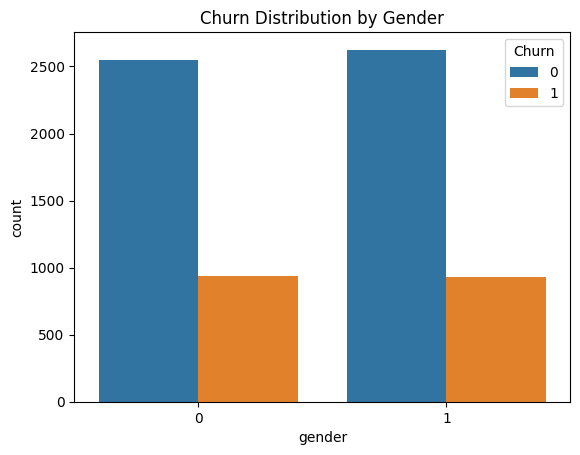

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn Distribution by Gender')
plt.show()


# Explore the relationship between columns

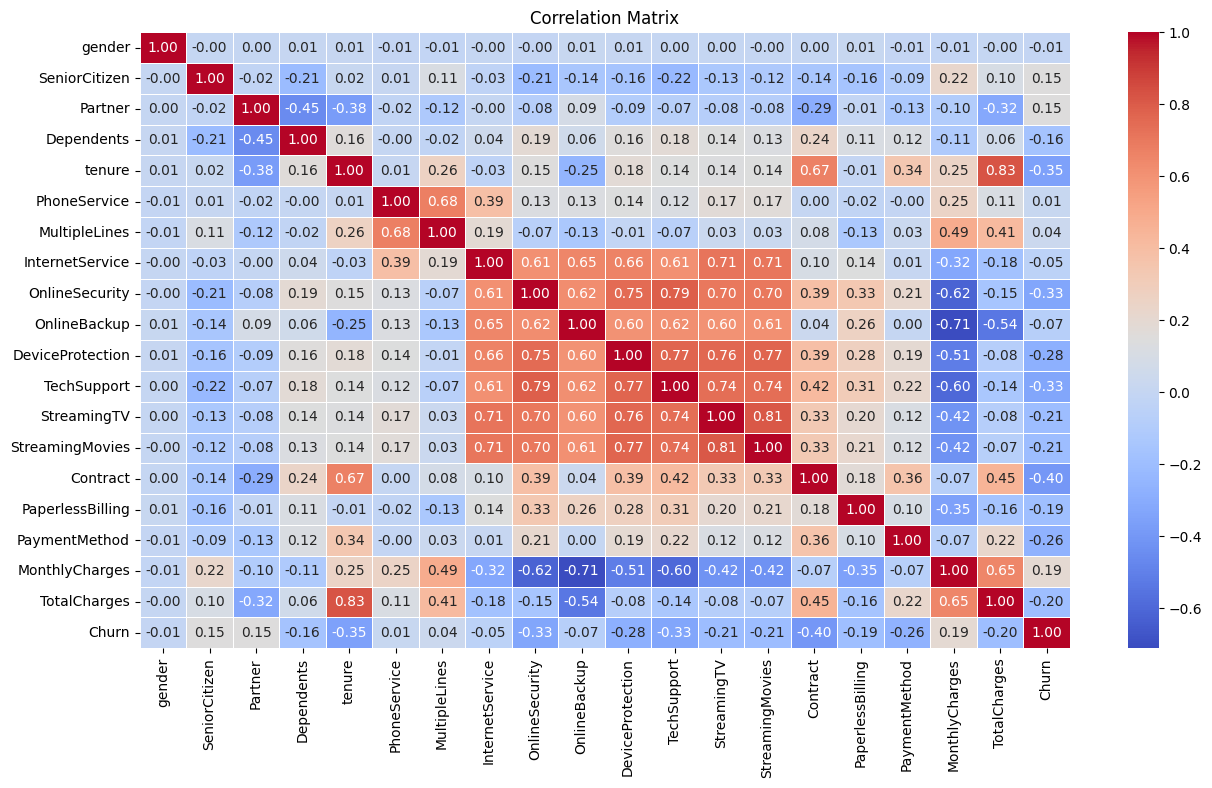

Churn               1.000000
MonthlyCharges      0.193356
SeniorCitizen       0.150889
Partner             0.150448
MultipleLines       0.036310
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
OnlineBackup       -0.074205
Dependents         -0.164221
PaperlessBilling   -0.191825
TotalCharges       -0.198324
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with the target variable 'Churn'
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)


# Goal column = Churn
# Find the most importance feature using RandomForest

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Split features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)


             Feature  Importance
18      TotalCharges    0.190230
17    MonthlyCharges    0.175591
4             tenure    0.158529
14          Contract    0.077784
16     PaymentMethod    0.056186
8     OnlineSecurity    0.044801
11       TechSupport    0.042001
0             gender    0.028147
7    InternetService    0.025885
15  PaperlessBilling    0.025148
9       OnlineBackup    0.024771
6      MultipleLines    0.022790
2            Partner    0.022764
10  DeviceProtection    0.021307
13   StreamingMovies    0.020388
1      SeniorCitizen    0.020249
3         Dependents    0.020187
12       StreamingTV    0.019009
5       PhoneService    0.004233


# Use RandomForest to determine churn 

In [9]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'churn' and the features are all other columns
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}')


Training set size: 5634, Testing set size: 1409


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])  # Probability for the positive class

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7942
Precision: 0.6531
Recall: 0.4745
F1 Score: 0.5497
ROC AUC: 0.8355
Confusion Matrix:
[[942  94]
 [196 177]]


# Use GridSearch (same as Optuna) to find best hyperparameters

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the model
y_pred_best = best_rf_model.predict(X_test)
print(f'Accuracy with best model: {accuracy_score(y_test, y_pred_best):.4f}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_sa

# Testing with Tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer and first hidden layer (use ReLU activation)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Additional hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/Users/nampham/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6863 - loss: 4.3204 - val_accuracy: 0.7821 - val_loss: 2.7325
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.7396 - loss: 1.4014 - val_accuracy: 0.4578 - val_loss: 3.4291
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.7215 - loss: 1.5542 - val_accuracy: 0.7956 - val_loss: 0.4814
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7604 - loss: 0.6182 - val_accuracy: 0.6118 - val_loss: 0.7413
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.7620 - loss: 0.6078 - val_accuracy: 0.6111 - val_loss: 0.7448
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7479 - loss: 0.6633 - val_accuracy: 0.8055 - val_loss: 0.5141
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7562 - loss: 0.5767 - val_accuracy: 0.7899 - val_loss: 0.6930
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7636 - loss: 0.5863 - va

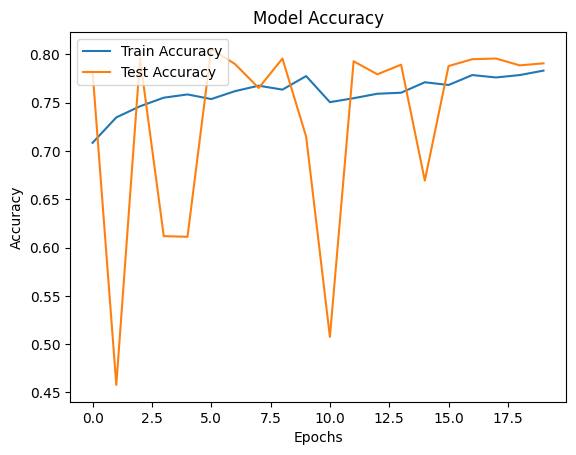

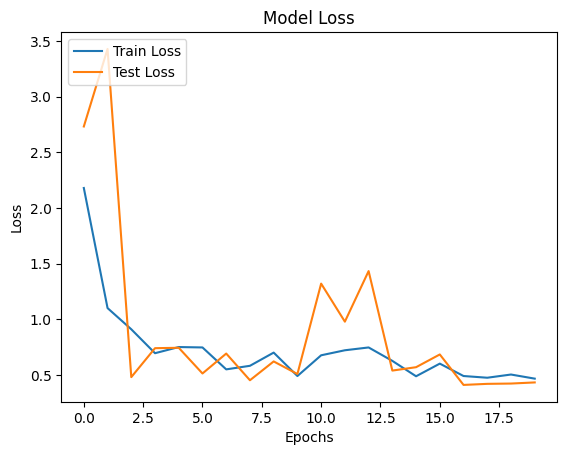

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history 
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test))  # Using probabilities for AUC

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Accuracy: 0.7906
Precision: 0.6806
Recall: 0.3941
F1 Score: 0.4992
ROC AUC: 0.8404
Confusion Matrix:
[[967  69]
 [226 147]]
